In [1]:
from math import cos, sin, radians, degrees
from vec3 import Vec3, dot
from zipinPaper import zipin

In [2]:
def surface(phi, theta):
    N = Vec3(0,0,1)
    H = Vec3(cos(theta), 0.0, sin(theta))
    I = Vec3(sin(phi), 0.0, cos(phi))
    return N, H, I
    
def G1(wn, wh, w):
    hdotw = dot(wh,w)
    if hdotw <= 0:
        return 0
    ndoth = dot(wn,wh)
    ndotw = dot(wn,w)
    return 2*ndoth*ndotw/hdotw
 
def G2(N, H, I, O):
    return min(1,G1(N,H,I),G1(N,H,O))

def Gzipin(theta, phi):
    theta = radians(theta)
    phi = radians(phi)
    
    for hit in zipin(degrees(theta),degrees(phi)):
        angle, area, bounce, side, zg= hit
        if side == 'left' and bounce == 1:
            N, H, I = surface(phi, theta)
            a = -radians(angle)
            O = Vec3(sin(a), 0.0, cos(a))
            assert(abs(area*G1(N,H,I) - zg) < .00001)
            assert(checkCorrectO(O, I, H))
            return zg
               
    return 0

def checkCorrectO(O, I, H):
    midOI = (O + I).norm()
    diff = H - midOI
    dis = diff.dot(diff)
    if  dis > .00001:
        print (O, I, midOI, H)
    return dis < .00001

def check(theta, phi):
    theta = radians(theta)
    phi = radians(phi)
    
    hits = zipin(degrees(theta),degrees(phi))
    
    N, Hl, I = surface(phi, theta)
    Hr = Vec3(-Hl.x, Hl.y, Hl.z)
    N = Vec3(0,0,1)
 
    for hit in hits:
        angle, area, bounce, side, zg = hit
        a = -radians(angle)
        O = Vec3(sin(a), 0.0, cos(a))
        if bounce == 1:
            if side == 'left':
                g = area*G1(N,Hl,I)
                h = G2(N,Hl,I,O)
                assert checkCorrectO(O, I, Hl)
            else:
                g = area*G1(N,Hr,I)
                h = G2(N,Hr,I,O)
                assert checkCorrectO(O, I, Hr)
            assert abs(g-h) < 0.0001               
    return hits

In [3]:
for phi in range(1,91):
    for theta in range(0,91):
        check(phi,theta)

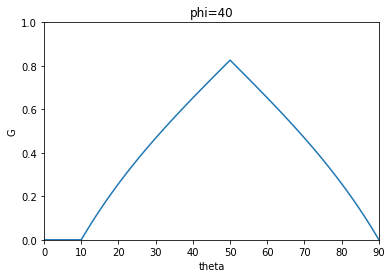

In [4]:
import sys;
sys.path.append('/usr/local/lib/python3.6/site-packages')
import matplotlib.pyplot as plt;

phi = 40
x = []
y = []
for theta in range(0,91):
    x.append(theta)
    y.append(Gzipin(phi,theta))
    
plt.plot(x, y);
plt.axis([0,90,0,1])
plt.xlabel('theta')
plt.ylabel('G')
plt.title('phi={}'.format(phi))
plt.show()  